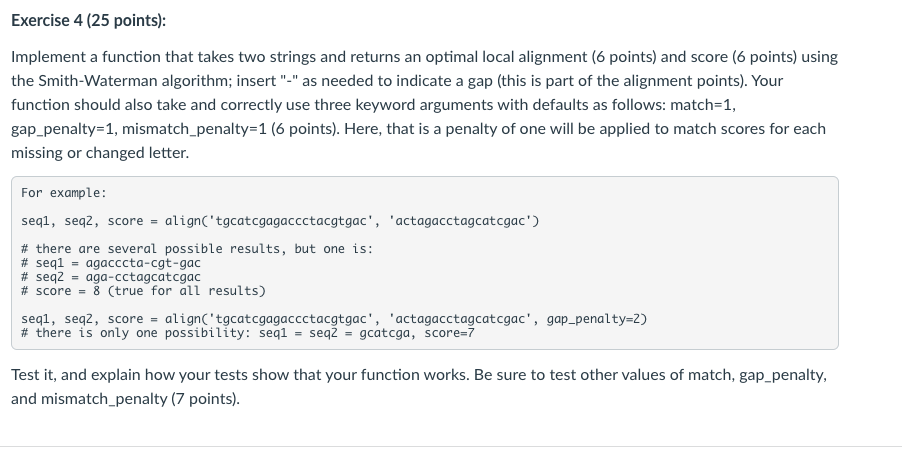

In [ ]:
For example:

seq1, seq2, score = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac')

# there are several possible results, but one is:
# seq1 = agacccta-cgt-gac
# seq2 = aga-cctagcatcgac
# score = 8 (true for all results)

seq1, seq2, score = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', gap_penalty=2)
# there is only one possibility: seq1 = seq2 = gcatcga, score=7

In [13]:
import numpy as np

def align(seq1, seq2, match=1, gap_penalty=1, mismatch_penalty=1):
    path = {}
    
    S = np.zeros((len(seq1) + 1, len(seq2) + 1), dtype = 'int')  

    for i in range(0, len(seq1) + 1):
        path['[' + str(i) + ', 0]'] = []
    for i in range(0, len(seq2) + 1):
        path['[0, ' + str(i) + ']'] = []

    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            if seq1[i - 1] == seq2[j - 1]:
                L = S[i - 1, j - 1] + match #match
            else:
                L = S[i - 1, j - 1] - mismatch_penalty #substitute
            
            P = S[i - 1, j] - gap_penalty #gap in seq2
            Q = S[i, j - 1] - gap_penalty #gap in seq1
            S[i, j] = max(L, P, Q, 0)
            path_key = '[' + str(i) + ', ' + str(j) + ']'
            path[path_key] = []
            if L == S[i, j]:
                path[path_key].append('[' + str(i - 1) + ', ' + str(j - 1) + ']')
            if P == S[i, j]:
                path[path_key].append('[' + str(i - 1) + ', ' + str(j) + ']')
            if Q == S[i, j]:
                path[path_key].append('[' + str(i) + ', ' + str(j - 1) + ']')
    end = np.argwhere(S == S.max()) #find the max score

    for i in end: #traceback to find the route
        key = str(list(i))
        value = path[key]
        result = [key]
        traceback(path, S, value, result, seq1, seq2)
    print("score = " + str(S.max()))

def traceback(path, S, value, result, seq1, seq2):
    if value != []:
        i = int((value[0].split(',')[0]).strip('['))
        j = int((value[0].split(',')[1]).strip(']'))        
        key = value[0]
        result.append(key)
        value = path[key]
    if S[i, j] != 0:
        traceback(path, S, value, result, seq1, seq2)
    else:
        x = 0
        y = 0
        s1 = ''
        s2 = ''
        for n in range(len(result)-2, -1, -1):
            point = result[n]
            i = int((point.split(',')[0]).strip('['))
            j = int((point.split(',')[1]).strip(']'))
            if i == x:
                s1 += '-'
                s2 += seq2[j-1]
            elif j == y:
                s1 += seq1[i-1]
                s2 += '-'
            else:
                s1 += seq1[i-1]
                s2 += seq2[j-1]
            x = i
            y = j     
        print("seq1 = {}".format(s1))
        print("seq2 = {}".format(s2))


align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac')



seq1 = agacccta-cgt-gac
seq2 = aga-cctagcatcgac
score = 8


In [12]:
align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', gap_penalty=2)

seq1 = gcatcga
seq2 = gcatcga
score = 7


In [14]:
align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', gap_penalty=2,mismatch_penalty=3)

seq1 = gcatcga
seq2 = gcatcga
score = 7


In [16]:
align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', match=2, gap_penalty=2,mismatch_penalty=3)

seq1 = agacccta-cgt-gac
seq2 = aga-cctagcatcgac
score = 15


In [17]:
align('ACTAGACCTAGCATCGAC', 'TGCATCGAGACCCTACGTGAC', 10, 3, 7)

seq1 = A-C-TAGA-CCTA-GCATCGAC
seq2 = ATCG-AGACCCTACG--T-GAC
score = 116
